In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loading the DataSet

In [2]:
df = pd.read_csv("bank-additional-full.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41187.000000,41187,41187,41187,41187,41187,41187,41187,41187,41187,...,41187.000000,41187.000000,41187.000000,41187,41187.000000,41187.000000,41187.000000,41187.000000,41187.00000,41187
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24927,12168,32587,21575,33949,26143,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36547
mean,40.023235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567582,962.474567,0.172943,NaN,0.081914,93.575635,-40.502350,3.621354,5167.04085,NaN
std,10.420032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770046,186.913090,0.494890,NaN,1.570968,0.578817,4.627976,1.734421,72.24545,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.60000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.10000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.00000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.10000,NaN


In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## EXPLORATORY DATA ANALYSIS

#### AGE

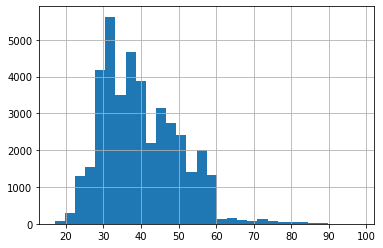

In [5]:
df["age"].hist(bins=30)
plt.show()

Most of the people who were contacted were in the age group 25-50 years.

#### JOB

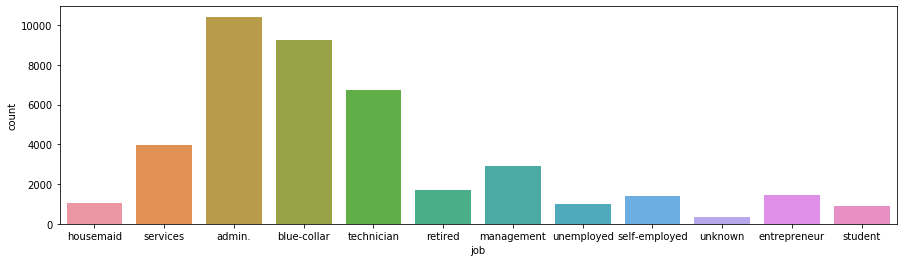

In [6]:
plt.figure(figsize=(15,4))
sns.countplot(x = "job", data = df)

#### MARITAL

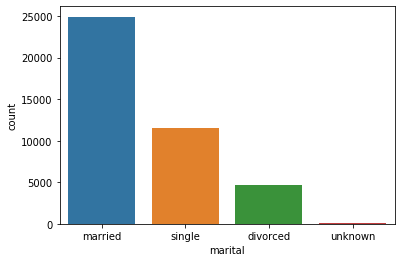

In [7]:
sns.countplot(x = "marital", data = df)

#### EDUCATION

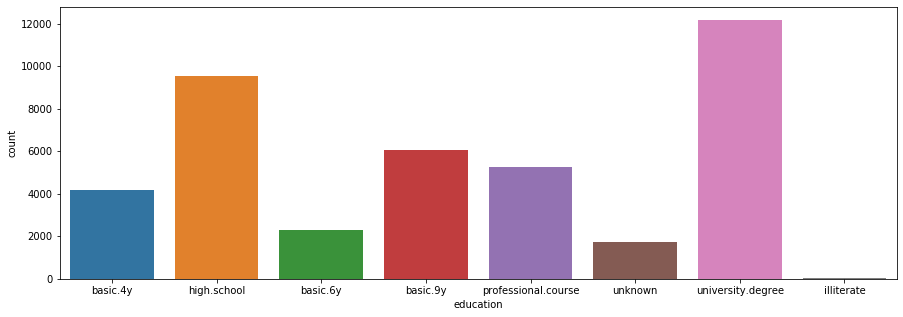

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(x = "education", data = df)

We Replace 'basic.4y','basic.6y','basic.9y' as 'basic'

In [9]:
df.replace(['basic.4y','basic.6y','basic.9y'],'basic',inplace = True)

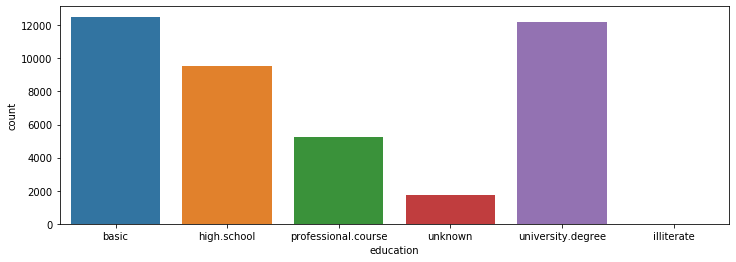

In [10]:
plt.figure(figsize=(12,4))
sns.countplot(x = "education", data = df)

#### Default: has credit in default? (categorical: 'no','yes','unknown')

In [11]:
df["default"].value_counts()

no         32587
unknown     8597
yes            3
Name: default, dtype: int64

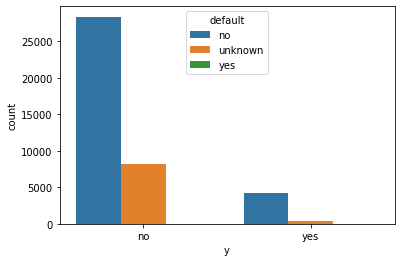

In [12]:
sns.countplot(x = "y", hue = "default", data = df)

1)Only 3 of those who have credit(default) have taken the bank deposit.
2)If we impute the 'unknown' with the majority vote of 'no', we get all the values as 'NO'
3)Thus, only 3 values are 'Yes'.
4)Thus, we drop 'default' column

In [13]:
df1 = df.drop(["default"],axis = 1)

#### housing: has housing loan? (categorical: 'no','yes','unknown')

In [14]:
df["housing"].value_counts()

yes        21575
no         18622
unknown      990
Name: housing, dtype: int64

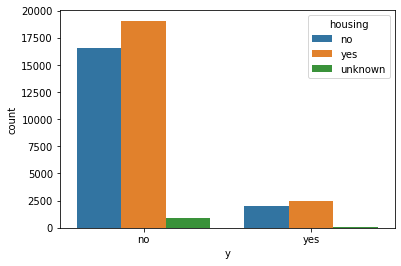

In [15]:
sns.countplot(x = "y", hue = "housing", data = df)

Since many of the people have taken the housing loan, we replace the 'unknown' with 'yes'

In [16]:
df1["housing"] = df1["housing"].replace(["unknown"],"yes")
df1["housing"].value_counts()

yes    22565
no     18622
Name: housing, dtype: int64

#### loan: has personal loan? (categorical: 'no','yes','unknown')

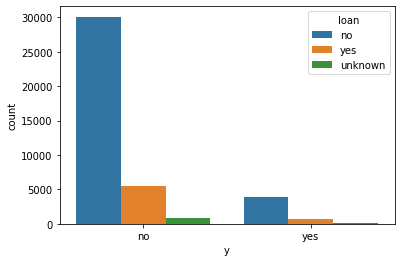

In [17]:
sns.countplot(x = "y", hue = "loan", data = df)

In [18]:
df1["loan"].value_counts()

no         33949
yes         6248
unknown      990
Name: loan, dtype: int64

In [19]:
df1["loan"] = df1["loan"].replace(["unknown"],"no")
df1["loan"].value_counts()

no     34939
yes     6248
Name: loan, dtype: int64

#### The columns 'contact','month','day_of_week','pdays' are of less importance and thus we drop them

In [20]:
df2 = df1.drop(["contact","month","day_of_week","pdays"],axis = 1)

In [21]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'duration',
       'campaign', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### DURATION

The data present in 'Duration' is in seconds. However we cannot take the column as it is as that will give more weightage to more number of seconds. Thus we use scaling.

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
a = scaler.fit_transform(df2.duration.values.reshape(-1,1))

In [23]:
df2["duration"] = a

#### Poutcome

In [24]:
pd.crosstab(df["poutcome"],df["y"])

y,no,yes
poutcome,,
failure,3646,605
nonexistent,32422,3141
success,479,894


Since, most of the poutcome is 'nonexistent', we drop the column

In [25]:
df3 = df2.drop(["poutcome"],axis=1)
df3.head()

,age,job,marital,education,housing,loan,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,0.010469,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,-0.421497,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,-0.124520,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,-0.413784,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,0.187884,1,0,1.1,93.994,-36.4,4.857,5191.0,no


#### Converting Categorical to Numerical

Since there are many categorical values each having different type of values, we cannot use OneHotEncoder as it will increase the number of columns. So we go with 'LabelEncoder'

In [26]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()

In [27]:
df3["job"] = l1.fit_transform(df3.job)
df3["marital"] = l1.fit_transform(df3.marital)
df3["education"] = l1.fit_transform(df3.education)
df3["housing"] = l1.fit_transform(df3.housing)
df3["loan"] = l1.fit_transform(df3.loan)

In [28]:
final_outcome = {"y" : {"yes":1 , "no":0}}
df3.replace(final_outcome,inplace=True)

In [29]:
df3.head()

,age,job,marital,education,housing,loan,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0.010469,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,1,0,0,-0.421497,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,1,1,0,-0.124520,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,0,-0.413784,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,1,0,1,0.187884,1,0,1.1,93.994,-36.4,4.857,5191.0,0


In [30]:
df3.shape

(41187, 15)

In [31]:
X = df3.iloc[:,0:14]
X[0:10]

,age,job,marital,education,housing,loan,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0.010469,1,0,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,1,0,0,-0.421497,1,0,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,1,1,0,-0.124520,1,0,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,0,0,0,-0.413784,1,0,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,1,0,1,0.187884,1,0,1.1,93.994,-36.4,4.857,5191.0
5,45,7,1,0,0,0,-0.232512,1,0,1.1,93.994,-36.4,4.857,5191.0
6,59,0,1,3,0,0,-0.460066,1,0,1.1,93.994,-36.4,4.857,5191.0
7,41,1,1,5,0,0,-0.159232,1,0,1.1,93.994,-36.4,4.857,5191.0
8,24,9,2,3,1,0,0.469434,1,0,1.1,93.994,-36.4,4.857,5191.0
9,25,7,2,1,1,0,-0.803325,1,0,1.1,93.994,-36.4,4.857,5191.0


In [32]:
y = df3.iloc[:,14]
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: y, dtype: int64

In [33]:
y.value_counts()

0    36547
1     4640
Name: y, dtype: int64

Since our dependent variable(y) is unbalanced, we give weightage to each class.

In [34]:
# For Class '0' or 'No'
41187/(2*36547)

0.563479902591184

In [35]:
#For Class '1' or 'Yes'
41187/(2*4640)

4.438254310344828

Instead of the above, we can even do it by doing classweight = 'balanced'

## Train-Test Split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=10)

In [37]:
X_train.shape,y_train.shape

((28830, 14), (28830,))

In [38]:
X_test.shape, y_test.shape

((12357, 14), (12357,))

## LOGISTIC REGRESSION

In [39]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(class_weight = {0:0.563479902591184,1:4.438254310344828})
model1.fit(X_train,y_train)

C:\Users\Dharmil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0,
                   class_weight={0: 0.563479902591184, 1: 4.438254310344828},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None,
                   penalty='l2', random_state=None, solver='warn', tol=0.0001,
                   verbose=0, warm_start=False)

In [40]:
print('classes: ',model1.classes_)
print('coefficients: ',model1.coef_)
print('intercept :',model1.intercept_)

classes:  [0 1]
coefficients:  [[ 0.00728458  0.01691412  0.17200522  0.14774712  0.10106808 -0.02985045
   1.75831246 -0.04205752  0.17933681 -1.06283338  0.58338343  0.01355385
   0.49698348 -0.01121667]]
intercept : [0.00749148]


In [41]:
pred1 = model1.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score,auc
con_mat1 = confusion_matrix(y_test, pred1)
print(con_mat1)

[[9162 1808]
 [ 190 1197]]


In [43]:
model1.score(X_test,y_test)

0.8383102694828842

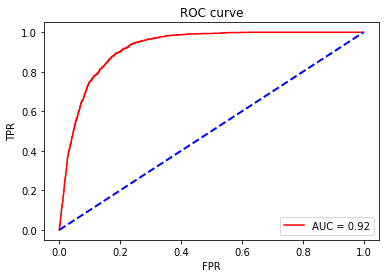

In [44]:
##Computing false and true positive rates
#fpr, tpr, threshold = roc_curve(y_test,result.predict_proba(X_test)[:,1],drop_intermediate=False)
probs = model1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [45]:
from sklearn.metrics import classification_report

actual1 = y_test
predicted1 = pred1

print("Classification Report using Logistic Regression: ")

print(classification_report(actual1,predicted1))

Classification Report using Logistic Regression: 
              precision    recall  f1-score   support

           0       0.98      0.84      0.90     10970
           1       0.40      0.86      0.55      1387

    accuracy                           0.84     12357
   macro avg       0.69      0.85      0.72     12357
weighted avg       0.91      0.84      0.86     12357



## SUPPORT VECTOR MACHINE

In [46]:
from sklearn.svm import SVC

In [47]:
model2 = SVC(class_weight = 'balanced',probability = True)

In [48]:
model2.fit(X_train,y_train)

C:\Users\Dharmil\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [49]:
pred2 = model2.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred2)

0.8567613498421947

In [51]:
con_mat1 = confusion_matrix(y_test, pred2)
print(con_mat1)

[[9464 1506]
 [ 264 1123]]


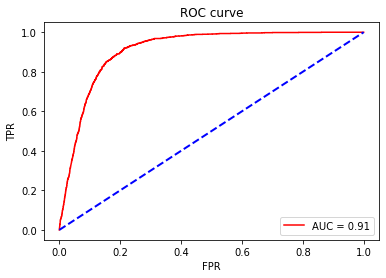

In [52]:
##Computing false and true positive rates
#fpr, tpr, threshold = roc_curve(y_test,result.predict_proba(X_test)[:,1],drop_intermediate=False)
probs = model2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [53]:
actual2 = y_test
predicted2 = pred2

print("Classification Report using Support Vector Machine: ")
print(classification_report(actual2,predicted2))

Classification Report using Support Vector Machine: 
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     10970
           1       0.43      0.81      0.56      1387

    accuracy                           0.86     12357
   macro avg       0.70      0.84      0.74     12357
weighted avg       0.91      0.86      0.87     12357



## RANDOM FOREST CLASSIFIER

In [54]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(class_weight = "balanced")

In [55]:
model3.fit(X_train,y_train)

C:\Users\Dharmil\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [56]:
pred3 = model3.predict(X_test)

In [57]:
accuracy_score(y_test, pred3)

0.9033746054867686

In [58]:
con_mat1 = confusion_matrix(y_test, pred3)
print(con_mat1)

[[10636   334]
 [  860   527]]


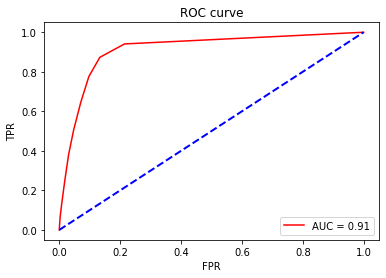

In [59]:
##Computing false and true positive rates
#fpr, tpr, threshold = roc_curve(y_test,result.predict_proba(X_test)[:,1],drop_intermediate=False)
probs = model3.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [60]:
actual3 = y_test
predicted3 = pred3

print("Classification Report using Random Forest Classifier: ")
print(classification_report(actual3,predicted3))

Classification Report using Random Forest Classifier: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10970
           1       0.61      0.38      0.47      1387

    accuracy                           0.90     12357
   macro avg       0.77      0.67      0.71     12357
weighted avg       0.89      0.90      0.89     12357



The Detailed analysis of the project is in the report.